In [13]:
import numpy as np
import pandas as pd
import xlrd
import itertools
import pylab
import matplotlib.pyplot as plt
from datetime import datetime as dt
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, SelectPercentile, chi2
import seaborn as sns
%matplotlib inline

In [5]:
pd. pandas.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [14]:
dataset = pd.read_csv("dataset.csv")
dataset.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2


In [9]:
dataset.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

In [19]:
dataset.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
Elevation,581002.0,2959.371136,279.980764,1859.0,2809.0,2996.0,3163.0,3858.0
Aspect,581002.0,155.657158,111.913616,0.0,58.0,127.0,260.0,360.0
Slope,581002.0,14.103702,7.488241,0.0,9.0,13.0,18.0,66.0
Horizontal_Distance_To_Hydrology,581002.0,269.429880,212.549971,0.0,108.0,218.0,384.0,1397.0
Vertical_Distance_To_Hydrology,581002.0,46.419222,58.295524,-173.0,7.0,30.0,69.0,601.0
Horizontal_Distance_To_Roadways,581002.0,2350.165252,1559.257261,0.0,1106.0,1997.0,3328.0,7117.0
Hillshade_9am,581002.0,212.145838,26.769947,0.0,198.0,218.0,231.0,254.0
Hillshade_Noon,581002.0,223.318806,19.768789,0.0,213.0,226.0,237.0,254.0
Hillshade_3pm,581002.0,142.528609,38.274526,0.0,119.0,143.0,168.0,254.0
Horizontal_Distance_To_Fire_Points,581002.0,1980.292908,1324.176031,0.0,1024.0,1710.0,2550.0,7173.0


Text(0.5, 0, 'Quantities')

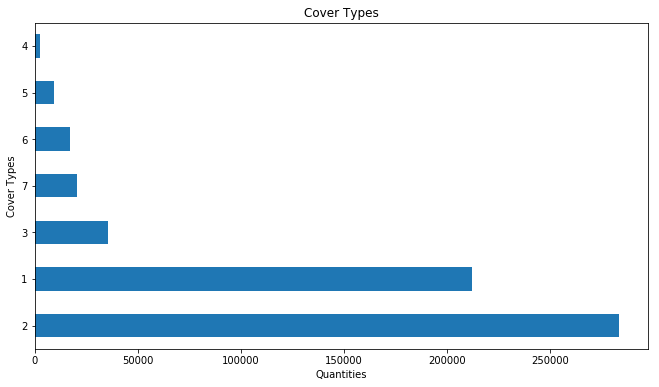

In [12]:
fig = plt.figure(figsize=(11,6))
fig = dataset['Cover_Type'].value_counts().plot.barh()
fig.set_title('Cover Types')
fig.set_ylabel('Cover Types')
fig.set_xlabel('Quantities')